#**Exploratory Data Analysis (EDA)**

# Step 1: Imports and Reading Data

In [ ]:
# mount google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
# define filepath of dataset
filepath = "path-dataset-gdrive"

In [ ]:
# show all the columns without truncation
pd.set_option('display.max_columns', None)

In [ ]:
# read dataset CSV file into a pandas DataFrame
taxi_trip = pd.read_csv(filepath)

<ipython-input-5-b8267a8a00fd>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_trip = pd.read_csv(filepath)


In [ ]:
# show the dataset
taxi_trip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN


# Step 2: Data Understanding




In [ ]:
# printing a concise summary of the dataset
taxi_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

The consistent number of null values in several columns indicates that the DataFrame is the result of concatenating 2 data sources (Yellow Cab and Uber).

## Handling Empty Colomn and Null Values


Because all values in the ehail_fee column are null, the column can be dropped.

In [ ]:
# drop the ehail_fee column from the DataFrame
taxi_trip = taxi_trip.drop('ehail_fee', axis=1)

Check if the ehail_fee column has been dropped by getting the column labels of the DataFrame.

In [ ]:
# get the column labels of the DataFrame
taxi_trip.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

## Define Categorical and Continuous Columns from the Dataset

**Categorical Columns**
1.   VendorID
2.   store_and_fwd_flag
3.   RatecodeID
4.   PULocationID
5.   DOLocationID
6.   payment_type
7.   trip_type
8.   passenger_count

**Continuous Columns**
1.   trip_distance
2.   fare_amount
3.   extra
4.   mta_tax
5.   tip_amount
6.   tolls_amount
7.   improvement_surcharge
8.   total_amount
9.   congestion_surcharge

**Datetime Column**
1.   lpep_pickup_datetime
2.   lpep_dropoff_datetime



## Explore the Values of the Categorical Column That Only Exist in the Yellow Cab Data.

###VendorID
A code indicating the TPEP provider that provided the record.

1= Creative Mobile Technologies, LLC

2= VeriFone Inc.

In [ ]:
# explore VendorID's values
taxi_trip['VendorID'].value_counts()

2.0    43554
1.0     7619
Name: VendorID, dtype: int64

In [ ]:
# sum up the counts in the output to get the total number of Yellow Cab data
taxi_trip['VendorID'].value_counts().sum()

51173

###store_and_fwd_flag
This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

In [ ]:
# explore store_and_fwd_flag's values
taxi_trip['store_and_fwd_flag'].value_counts()

N    50977
Y      196
Name: store_and_fwd_flag, dtype: int64

In [ ]:
# sum up the counts in the output to get the total number of Yellow Cab data
taxi_trip['store_and_fwd_flag'].value_counts().sum()

51173

###RatecodeID
The final rate code in effect at the end of the trip.

1= Standard rate (the normal fare rate)

2=JFK (a flat fare to JFK airport)

3=Newark (a fare to Newark airport)

4=Nassau or Westchester (a fare to Nassau or Westchester counties)

5=Negotiated fare (a fare that was negotiated between the driver and passenger)

6=Group ride (a fare for a group of passengers)

In [ ]:
# explore RatecodeID's values
taxi_trip['RatecodeID'].value_counts()

1.0    48994
5.0     1954
2.0      158
4.0       41
3.0       26
Name: RatecodeID, dtype: int64

In [ ]:
# sum up the counts in the output to get the total number of Yellow Cab data
taxi_trip['RatecodeID'].value_counts().sum()

51173

###payment_type
A numeric code signifying how the passenger paid for the trip.

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip

In [ ]:
# explore payment_type's values
taxi_trip['payment_type'].value_counts()

1.0    29990
2.0    20831
3.0      307
4.0       44
5.0        1
Name: payment_type, dtype: int64

In [ ]:
# sum up the counts in the output to get the total number of Yellow Cab data
taxi_trip['payment_type'].value_counts().sum()

51173

From the `value_counts`, it can be seen that there are no `voided trips` in this data.

###trip_type
Based on [here](https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/discussion/326331)

1=inner-city

2=outer city

In [ ]:
# explore trip_type's values
taxi_trip['trip_type'].value_counts()

1.0    49413
2.0     1760
Name: trip_type, dtype: int64

In [ ]:
# sum up the counts in the output to get the total number of Yellow Cab data
taxi_trip['trip_type'].value_counts().sum()

51173

### extra
Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.

In [ ]:
# count the number of occurrences of each unique value in a column
taxi_trip['extra'].value_counts()

 0.00    37210
 2.75    25754
 1.00     9456
 0.50     8156
 5.50     1541
 1.35      856
 3.75      307
 3.25      160
 8.25       86
 4.10       74
-0.50       29
 4.50       28
-1.00       17
 6.85        8
-2.75        5
 1.75        2
-4.50        1
-1.35        1
Name: extra, dtype: int64

There is a negative value in the `extra` column.

In [ ]:
# check value of extra that negatif
taxi_trip[taxi_trip['extra'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1254,2.0,2021-07-01 16:30:21,2021-07-01 16:30:34,N,1.0,74,74,1.0,0.05,-2.50,-1.00,-0.5,0.00,0.0,-0.3,-4.30,3.0,1.0,0.0
1490,2.0,2021-07-01 18:14:31,2021-07-01 18:15:11,N,1.0,193,193,1.0,0.06,-2.50,-1.00,-0.5,0.00,0.0,-0.3,-4.30,3.0,1.0,0.0
1780,2.0,2021-07-01 21:28:50,2021-07-01 21:29:04,N,1.0,244,244,1.0,0.04,-2.50,-0.50,-0.5,0.00,0.0,-0.3,-3.80,3.0,1.0,0.0
1785,2.0,2021-07-01 21:56:39,2021-07-01 22:01:16,N,1.0,75,75,1.0,0.00,-4.50,-0.50,-0.5,0.00,0.0,-0.3,-5.80,3.0,1.0,0.0
5155,2.0,2021-07-03 20:09:07,2021-07-03 20:09:24,N,1.0,196,196,1.0,0.00,-2.50,-0.50,-0.5,0.00,0.0,-0.3,-3.80,4.0,1.0,0.0
5198,2.0,2021-07-03 21:14:33,2021-07-03 21:15:16,N,1.0,116,116,1.0,0.00,-2.50,-0.50,-0.5,0.00,0.0,-0.3,-3.80,3.0,1.0,0.0
5200,2.0,2021-07-03 21:42:21,2021-07-03 21:49:54,N,1.0,75,42,1.0,0.00,-6.00,-0.50,-0.5,0.00,0.0,-0.3,-7.30,3.0,1.0,0.0
5333,2.0,2021-07-04 00:55:59,2021-07-04 01:31:01,N,1.0,226,83,2.0,0.00,-20.00,-0.50,-0.5,0.00,0.0,-0.3,-21.30,3.0,1.0,0.0
6438,2.0,2021-07-04 23:23:33,2021-07-04 23:23:52,N,1.0,133,133,1.0,0.16,-2.50,-0.50,-0.5,0.00,0.0,-0.3,-3.80,3.0,1.0,0.0
10752,2.0,2021-07-07 16:56:04,2021-07-07 16:57:03,N,1.0,193,193,1.0,0.00,-2.50,-1.00,-0.5,-0.14,0.0,-0.3,-4.44,3.0,1.0,0.0


I will remove the rows that have negative values in the `extra` column.

In [ ]:
# the rows that have negative values
taxi_trip = taxi_trip.drop(taxi_trip[taxi_trip['extra'] < 0].index)

### total_amount
Total amount of all tolls paid in trip.

In [ ]:
# count the number of occurrences of each unique value in a column
taxi_trip['total_amount'].value_counts()

7.80      1157
6.80      1148
8.30      1134
7.30      1130
8.80      1079
          ... 
22.09        1
35.20        1
126.36       1
81.97        1
25.87        1
Name: total_amount, Length: 4623, dtype: int64

In [ ]:
# check value of total_amount that negatif
taxi_trip[taxi_trip['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
97,2.0,2021-07-01 06:07:26,2021-07-01 06:29:02,N,1.0,49,49,1.0,0.21,-12.00,0.0,-0.5,0.00,0.0,-0.3,-12.80,4.0,1.0,0.0
754,2.0,2021-07-01 12:38:55,2021-07-01 12:43:19,N,1.0,17,17,5.0,0.44,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,3.0,1.0,0.0
894,2.0,2021-07-01 13:13:03,2021-07-01 13:13:20,N,1.0,193,193,1.0,0.00,-2.50,0.0,-0.5,-0.66,0.0,-0.3,-3.96,3.0,1.0,0.0
1036,2.0,2021-07-01 15:40:54,2021-07-01 15:42:17,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,-1.14,0.0,-0.3,-4.94,3.0,1.0,0.0
2709,2.0,2021-07-02 13:56:26,2021-07-02 13:58:48,N,1.0,42,74,2.0,0.47,-4.00,0.0,-0.5,0.00,0.0,-0.3,-4.80,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49926,2.0,2021-07-31 10:44:07,2021-07-31 10:45:01,N,1.0,196,196,2.0,0.07,-2.50,0.0,-0.5,0.00,0.0,-0.3,-3.30,3.0,1.0,0.0
50031,2.0,2021-07-31 11:49:20,2021-07-31 11:50:20,N,1.0,193,193,1.0,0.00,-2.50,0.0,-0.5,0.00,0.0,-0.3,-3.30,3.0,1.0,0.0
64108,NaN,2021-07-11 18:27:00,2021-07-11 18:29:00,NaN,NaN,95,95,NaN,0.09,-20.91,0.0,0.0,3.17,0.0,0.3,-17.44,NaN,NaN,NaN
70488,NaN,2021-07-28 18:35:00,2021-07-28 18:37:00,NaN,NaN,61,61,NaN,0.13,-55.95,0.0,0.0,8.57,0.0,0.3,-47.08,NaN,NaN,NaN


There are some negative values in the `total_amount` column, the possible causes are:
1. There is an error in the payment or recording system.
2. There is a refund given to the passengers.

To clean the data, I will delete the rows that have negative values in the `total_amount` column because the cause is unknown and no better action can be done.

In [ ]:
# delete rows that have negative values
taxi_trip = taxi_trip[taxi_trip['total_amount'] >= 0]

In [ ]:
# check the number of rows in the DataFrame after taking action
taxi_trip.shape

(83541, 19)

In [ ]:
# check value of total_amount that negatif
taxi_trip[taxi_trip['total_amount'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
359,1.0,2021-07-01 09:49:16,2021-07-01 15:19:48,N,5.0,82,129,1.0,37.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
563,1.0,2021-07-01 11:13:03,2021-07-01 11:13:03,Y,5.0,65,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
912,2.0,2021-07-01 13:06:07,2021-07-01 13:07:16,N,1.0,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1288,2.0,2021-07-01 16:08:29,2021-07-01 16:09:49,N,1.0,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1289,2.0,2021-07-01 16:23:14,2021-07-01 16:23:57,N,1.0,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,1.0,2021-07-31 07:40:03,2021-07-31 07:54:31,N,5.0,208,18,1.0,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
49798,1.0,2021-07-31 09:10:31,2021-07-31 09:27:25,N,5.0,20,136,1.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
49799,1.0,2021-07-31 09:38:31,2021-07-31 10:48:46,N,5.0,241,200,1.0,19.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
49957,1.0,2021-07-31 11:29:24,2021-07-31 12:07:35,N,5.0,60,31,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


There are some zero (0) values in the total_amount column. The possible causes could be errors in the payment or recording system. To clean the data, I will delete the rows that have zero values in the total_amount column.

However, I will filter rows where the value in the `total_amount` column is equal 0 and the value in the `payment_type` column is equal to 3, because 3 in `payment_type` means **no charge**.

In the context of Yellow Cab taxi data, **no charge** means that the passenger did not pay for the trip. This can happen when the passenger is a VIP or when the trip is free for some other reason.

In [ ]:
# filter rows where the value in the total_amount column is equal 0 and the value in the payment_type column is equal to 3
taxi_trip[(taxi_trip['total_amount']== 0) & (taxi_trip['payment_type']==3)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2098,1.0,2021-07-02 07:13:33,2021-07-02 07:15:31,N,5.0,129,129,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
10680,1.0,2021-07-07 15:58:28,2021-07-07 15:59:30,Y,5.0,82,82,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
29034,1.0,2021-07-18 13:16:50,2021-07-18 13:17:30,N,5.0,196,196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
33399,1.0,2021-07-21 12:52:28,2021-07-21 13:04:44,N,5.0,41,42,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0


In [ ]:
# check the number of rows in the DataFrame before taking action
taxi_trip.shape

(83541, 19)

In [ ]:
# delete rows that have negative values
taxi_trip = taxi_trip.drop(taxi_trip[(taxi_trip['total_amount'] == 0) & (taxi_trip['payment_type'] == 3)].index)

In [ ]:
# check the number of rows in the DataFrame after taking action
taxi_trip.shape

(83537, 19)

###passenger_count
The number of passengers in the vehicle.
This is a driver-entered value.

In [ ]:
# explore passenger_count's values
taxi_trip['passenger_count'].value_counts()

1.0     44007
2.0      3905
5.0      1235
6.0      1018
3.0       625
4.0       181
0.0        54
7.0         2
32.0        1
Name: passenger_count, dtype: int64

In [ ]:
# sum up the counts in the output to get the total number of Yellow Cab data
taxi_trip['passenger_count'].value_counts().sum()

51028

Based on [here](https://www.tripadvisor.com/ShowTopic-g60763-i5-k1461038-How_many_passengers_can_REALLY_fit_into_a_taxi-New_York_City_New_York.html), the maximum number of passengers allowed in a Yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab. However, an additional passenger must be accepted if they are under the age of seven (7) and are held on the lap of an adult passenger seated in the rear.

So, I will remove some rows that have `passenger_count` values of 7 and 32, based on the law that if the `passenger_count` value is 6 people, then there may be 1 or 2 passengers under the age of 7.

### Handling Outlier in `passenger_count` Column

In [ ]:
# remove rows that have passenger_count values of 7 and 32
taxi_trip = taxi_trip[taxi_trip['passenger_count'].isin([7, 32]) == False]

In [ ]:
# check the number of rows in the DataFrame after taking action
taxi_trip.shape

(83534, 19)

It appears that 3 rows have been removed because we deleted rows that had `passenger_count` values of 7 and 32.

There are 56 rows with a `passenger_count` value of 0, so it's best not to remove them immediately. The zero(0) values can be caused by data input errors or missing values.

In [ ]:
# check 0 values in the passenger_count column and total_amount
# the total_amount charged to passengers, does not include CASH tips
taxi_trip[(taxi_trip['passenger_count']== 0) & (taxi_trip['total_amount']== 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2672,1.0,2021-07-02 12:10:58,2021-07-02 12:27:51,N,5.0,82,129,0.0,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
34436,1.0,2021-07-22 05:28:24,2021-07-22 05:52:37,Y,5.0,226,129,0.0,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
49685,1.0,2021-07-31 05:09:37,2021-07-31 05:11:30,N,5.0,247,247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


I will remove rows that have a passenger_count value of 0 and a total_amount value of 0.

In [ ]:
# remove rows that have a passenger_count value of 0 and total_amount value of 0
taxi_trip = taxi_trip.drop(taxi_trip[(taxi_trip.passenger_count == 0) & (taxi_trip.total_amount == 0)].index)

In [ ]:
# check the number of rows in the DataFrame after taking action
taxi_trip.shape

(83531, 19)

Five rows have been removed.

In [ ]:
# calculating the average of the passenger_count column
taxi_trip['passenger_count'].mean()

1.3072596135000587

In [ ]:
# calculating the median of the passenger_count column
median_pc = taxi_trip['passenger_count'].median()
median_pc

1.0

Because the `passenger_count` value must be an integer, the **median** is used to fill in the 0 value in `passenger_count`.

In [ ]:
# replacing the 0 value in the passenger_count column with the median
taxi_trip['passenger_count'] = taxi_trip['passenger_count'].replace(0, median_pc)

In [ ]:
# check the number of rows in the DataFrame after taking action
taxi_trip.shape

(83531, 19)

### trip_distance

In [ ]:
# count the number of occurrences of each unique value in a column
taxi_trip['trip_distance'].value_counts()

0.00     3378
1.40      507
1.60      408
1.00      383
1.20      382
         ... 
25.70       1
36.46       1
22.85       1
33.77       1
33.63       1
Name: trip_distance, Length: 3152, dtype: int64

`trip_distance` value cannot be zero.

In [ ]:
taxi_trip['trip_distance']

0         1.20
1        13.69
2         0.95
3         1.24
4         1.10
         ...  
83686    18.04
83687     5.56
83688     5.13
83689    12.58
83690    11.32
Name: trip_distance, Length: 83531, dtype: float64

In [ ]:
# calculate average trip_distance for each RateCodeID
median_distance_by_ratecode = taxi_trip.groupby('RatecodeID')['trip_distance'].median()
median_distance_by_ratecode

RatecodeID
1.0     2.000
2.0    17.320
3.0     0.135
4.0    11.900
5.0     1.590
Name: trip_distance, dtype: float64

In [ ]:
# calculate median
median_trip_distance = taxi_trip['trip_distance'].median()

In [ ]:
# define a function to apply the replacement
def replace_trip_distance(row):
    if row['trip_distance'] == 0.00:
        if row['RatecodeID'] == 1.0:
            return 2.000
        elif row['RatecodeID'] == 2.0:
            return 17.320
        elif row['RatecodeID'] == 3.0:
            return 0.135
        elif row['RatecodeID'] == 4.0:
            return 11.900
        elif row['RatecodeID'] == 5.0:
            return 1.590
        elif pd.isna(row['RatecodeID']):
            return median_trip_distance
    else:
        return row['trip_distance']

In [ ]:
# apply the function to the trip_distance column
taxi_trip['trip_distance'] = taxi_trip.apply(replace_trip_distance, axis=1)

In [ ]:
# check the value of trip_distance after replacing the 0 value
taxi_trip['trip_distance'].value_counts()

2.00         2462
2.76          757
1.59          659
1.40          507
1.60          408
             ... 
22.66           1
72.59           1
34.36           1
137479.31       1
33.63           1
Name: trip_distance, Length: 3152, dtype: int64

In [ ]:
taxi_trip['trip_distance'].value_counts().sum()

83531

In [ ]:
# calculate NaN values
taxi_trip['trip_distance'].isna().sum()

0

Text(0, 0.5, 'Count')

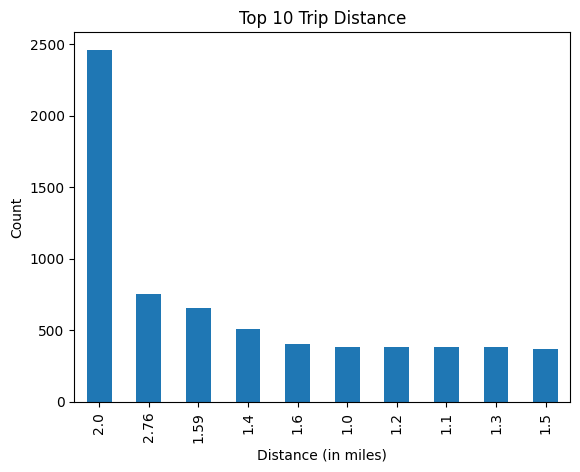

In [ ]:
# create a bar chart of the top 10
ax_trip_distance = taxi_trip['trip_distance'].value_counts().head(10).plot(kind='bar', title='Top 10 Trip Distance')
ax_trip_distance.set_xlabel('Distance (in miles)')
ax_trip_distance.set_ylabel('Count')

### congestion_surcharge
Total amount collected in trip for NYS congestion surcharge.

In [ ]:
# count the number of occurrences of each unique value in a column
taxi_trip['congestion_surcharge'].value_counts()

0.00    39057
2.75    11962
2.50        3
Name: congestion_surcharge, dtype: int64

In [ ]:
# count the total number of non-missing values
taxi_trip['congestion_surcharge'].value_counts().sum()

51022

There is no negative value in congestion_surcharge column.

###Handling Missing Value of All Columns

In [ ]:
# count the number of missing or null values in each column
taxi_trip.isna().sum()

VendorID                 32509
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32509
RatecodeID               32509
PULocationID                 0
DOLocationID                 0
passenger_count          32509
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
payment_type             32509
trip_type                32509
congestion_surcharge     32509
dtype: int64

The null values in the `VendorID`, `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` columns are the same in number, and come from Uber data because Uber data does not have a category for `RatecodeID`, `payment_type`, or `passenger_count` which is manually entered by the driver.

Uber also uses an smartphone app so it does not use `VendorID`, `store_and_fwd_flag`, `trip_type`, `congestion_surcharge`.

I will create a new column `taxi_type` with values based on conditions in the `payment_type` column, because Uber does not have a category for `payment_type`.

In [ ]:
# create a new column with values based on conditions in the payment_type column
taxi_trip['taxi_type'] = np.where(taxi_trip['payment_type'].isna(), 'Uber', 'Yellow')

In [ ]:
# check rows in the taxi_trip DataFrame that are duplicates
taxi_trip.loc[taxi_trip.duplicated()].count()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
taxi_type                0
dtype: int64

There is no duplicate data.

In [ ]:
# generate descriptive statistics of continuous columns
taxi_trip[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']].describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,83531.000000,83531.000000,83531.000000,83531.000000,83531.000000,83531.000000,83531.000000,83531.000000,51022.000000
mean,194.722794,20.435545,1.159522,0.294908,1.060574,0.625720,0.298779,24.261183,0.644879
std,4409.680383,15.540342,1.367388,0.245935,2.370323,1.992199,0.019101,17.211625,1.165134
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.520000,9.000000,0.000000,0.000000,0.000000,0.000000,0.300000,11.760000,0.000000
50%,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,0.300000,19.800000,0.000000
75%,6.220000,26.830000,2.750000,0.500000,1.660000,0.000000,0.300000,31.300000,0.000000
max,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,0.300000,480.310000,2.750000


In [ ]:
taxi_trip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,taxi_type
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,0.3,7.30,2.0,1.0,0.0,Yellow
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,0.3,43.30,2.0,1.0,0.0,Yellow
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,0.3,10.14,1.0,1.0,0.0,Yellow
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,0.3,7.80,2.0,1.0,0.0,Yellow
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.0,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,0.3,59.84,NaN,NaN,NaN,Uber
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,0.3,25.87,NaN,NaN,NaN,Uber
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,0.3,22.75,NaN,NaN,NaN,Uber
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,0.3,54.12,NaN,NaN,NaN,Uber


# Step 3: Feature Understanding
1. Correlation Heatmap: typically used to visualize correlations between numerical variables.
2. Ploting Feature Distributions
**Histograms** and **KDE** plots can provide an overview of data distribution, while **boxplots** can provide information about the range, median, and outliers of the data.



## Correlation Heatmap
only the continuous columns (`trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`)

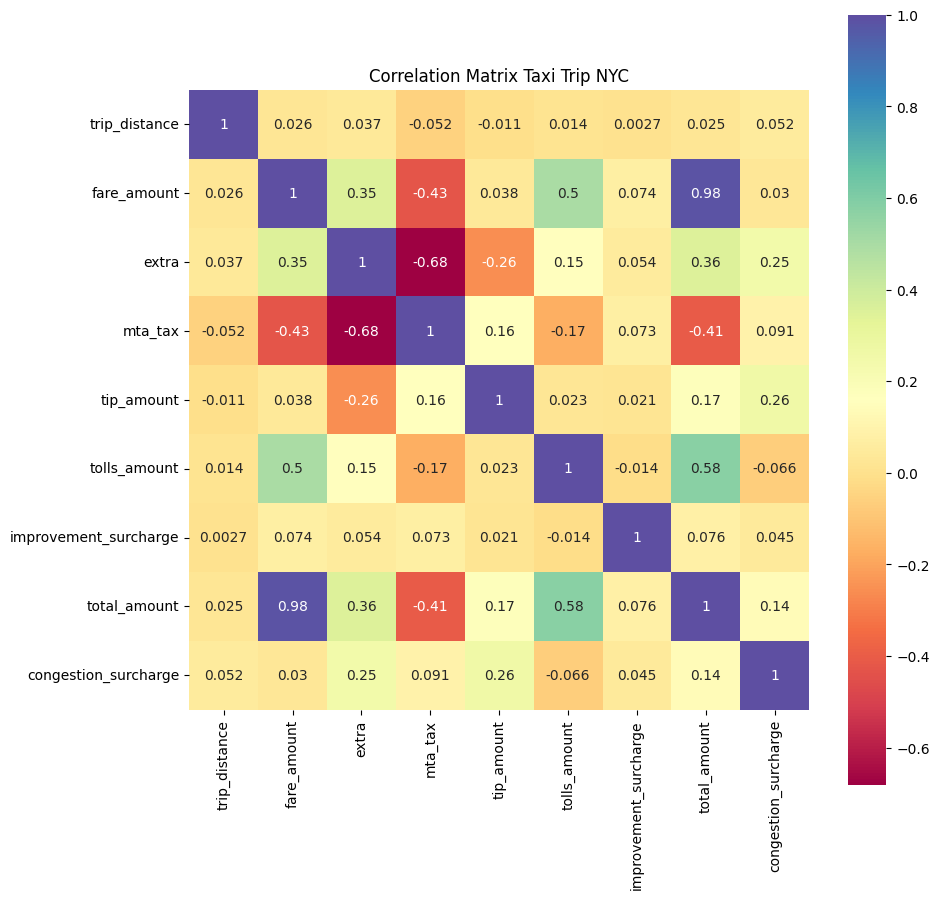

In [ ]:
corr_fig = taxi_trip[['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_fig, annot=True, cmap='Spectral', square=True)
plt.title('Correlation Matrix Taxi Trip NYC')
plt.show()

Based on [here](https://dailysocial.id/post/koefisien-korelasi/):

There is a very strong positive correlation between `fare_amount` and `total_amount`, which means that the larger the `fare_amount` value, the larger the `total_amount` value.

There is also a strong positive correlation between `tolls_amount` and `fare_amount` and `total_amount`.

There is a strong negative correlation between `extra` and `mta_tax`, which means that the larger the `extra` value, the smaller the `mta_tax` value, and vice versa.

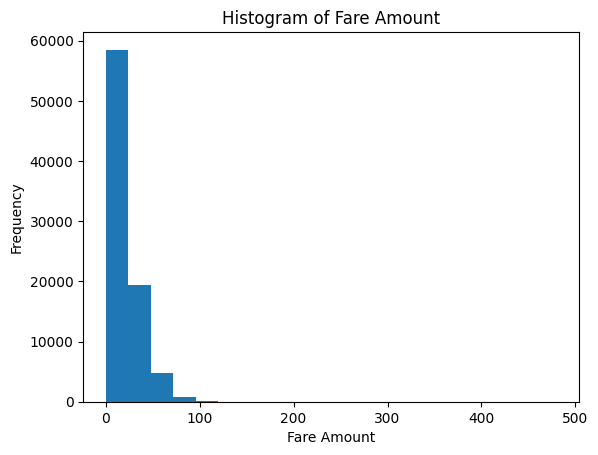

In [ ]:
# create histogram
plt.hist(taxi_trip['fare_amount'], bins=20)
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

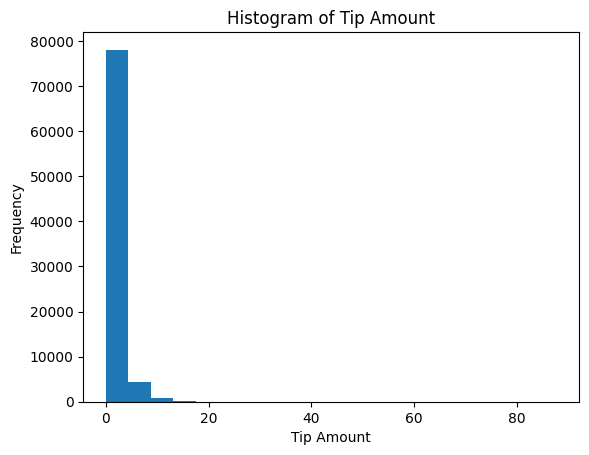

In [ ]:
# create histogram
plt.hist(taxi_trip['tip_amount'], bins=20)
plt.title('Histogram of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

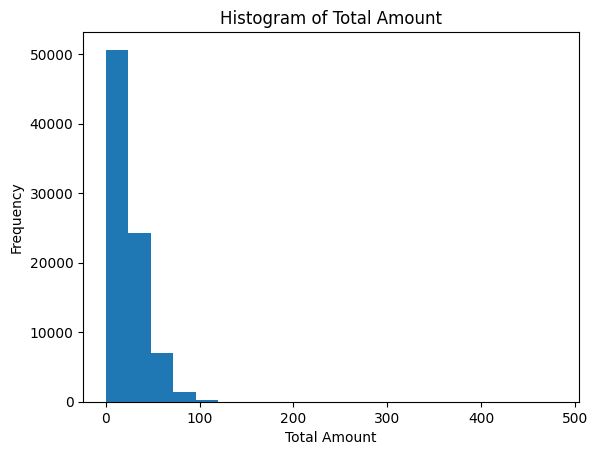

In [ ]:
# create histogram
plt.hist(taxi_trip['total_amount'], bins=20)
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

The distribution of `fare_amount`, `tip_amount`, `total_amount` is positively skewed, indicating that the majority of fares are lower than the average, with a few high fares pulling the mean upwards.

# Step 4: Preparing CSV for Dashboard

In [ ]:
# convert the pickup and dropoff columns to datetime format
taxi_trip['lpep_pickup_datetime'] = pd.to_datetime(taxi_trip['lpep_pickup_datetime'])
taxi_trip['lpep_dropoff_datetime'] = pd.to_datetime(taxi_trip['lpep_dropoff_datetime'])

# calculate the time difference between pickup and dropoff
travel_time = taxi_trip['lpep_dropoff_datetime'] - taxi_trip['lpep_pickup_datetime']

# convert the time difference to minutes
travel_time_minutes = travel_time / np.timedelta64(1, 'm')

# add the calculation result as a new column
taxi_trip['travel_time_minutes'] = travel_time_minutes

In [ ]:
# Format the travel_time_minutes column to display only 1 digit after the decimal point
taxi_trip['travel_time_minutes'] = taxi_trip['travel_time_minutes'].round(2)

In [ ]:
# extract date and time information from the pickup and dropoff columns
taxi_trip['pickup_date'] = taxi_trip['lpep_pickup_datetime'].dt.date
taxi_trip['pickup_time'] = taxi_trip['lpep_pickup_datetime'].dt.time
taxi_trip['dropoff_date'] = taxi_trip['lpep_dropoff_datetime'].dt.date
taxi_trip['dropoff_time'] = taxi_trip['lpep_dropoff_datetime'].dt.time

# convert the date column to datetime format
taxi_trip['pickup_date'] = pd.to_datetime(taxi_trip['pickup_date'])
taxi_trip['dropoff_date'] = pd.to_datetime(taxi_trip['dropoff_date'])

In [ ]:
taxi_trip.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,taxi_type,travel_time_minutes,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,Yellow,4.73,2021-07-01,00:30:52,2021-07-01,00:35:36
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,Yellow,35.92,2021-07-01,00:25:36,2021-07-01,01:01:31
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,Yellow,6.03,2021-07-01,00:05:58,2021-07-01,00:12:00
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,Yellow,5.72,2021-07-01,00:41:40,2021-07-01,00:47:23
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,Yellow,7.23,2021-07-01,00:51:32,2021-07-01,00:58:46


In [ ]:
# remove rows containing data from 2008 and 2009 due to outliers
taxi_trip = taxi_trip[(taxi_trip['pickup_date'].dt.year != 2008) & (taxi_trip['pickup_date'].dt.year != 2009)]
taxi_trip.shape

(83526, 25)

All remaining outliers in this data will be left alone because they can tell a story of an unusual event/phenomenon that can be used as input to management.

In [ ]:
# create a dictionary to map the values
payment_dict = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}

# replace the values in the payment_type column
taxi_trip['payment_type'] = taxi_trip['payment_type'].replace(payment_dict)

In [ ]:
# create a dictionary to map the values
vendor_dict = {1: 'Creative Mobile Technologies, LLC', 2: 'VeriFone Inc.'}

# replace the values in the VendorID column
taxi_trip['VendorID'] = taxi_trip['VendorID'].replace(vendor_dict)

In [ ]:
# create a dictionary to map the values
rate_dict = {1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride'}

# replace the values in the RateCodeID column
taxi_trip['RatecodeID'] = taxi_trip['RatecodeID'].replace(rate_dict)

In [ ]:
# create a dictionary to map the values
store_dict = {'Y': 'store and forward trip', 'N': 'not a store and forward trip'}

# replace the values in the store_and_fwd_flag column
taxi_trip['store_and_fwd_flag'] = taxi_trip['store_and_fwd_flag'].replace(store_dict)

Based on [here](https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv), I will make two new columns from the value of `PULocationID` and `DOLocationID`.

In [ ]:
# define filepath of dataset
filepath2 = "path-gdrive/taxi+_zone_lookup.csv"

In [ ]:
# read dataset CSV file into a pandas DataFrame
taxi_zone = pd.read_csv(filepath2)

In [ ]:
taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [ ]:
# First, set the index of the taxi_zone DataFrame to the ID column
taxi_zone = taxi_zone.set_index('LocationID')

# Create the 'PU_borough' column in taxi_trip by mapping the 'PULocationID' values to the 'Borough' values in taxi_zone
taxi_trip['PU_borough'] = taxi_trip['PULocationID'].map(taxi_zone['Borough'])

# Create the 'DO_borough' column in taxi_trip by mapping the 'DOLocationID' values to the 'Borough' values in taxi_zone
taxi_trip['DO_borough'] = taxi_trip['DOLocationID'].map(taxi_zone['Borough'])

In [ ]:
# save DataFrame as csv file
taxi_trip.to_csv('path-gdrive/taxi_trip_dashboard.csv', index=False)